In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from load_data import load_caract, load_lieux, load_usagers, load_vehicules
sns.set()

In [2]:
def load_data():
    base = {}
    for i in range(2009, 2022):
        base[i] = pd.read_csv("data/{year}.csv".format(year=i), sep=";")
        
    for i in range(2009, 2022):
        df[i] = pd.read_csv("data/{year}.csv".format(year=i), sep=";")
    
    return df[2016]

caract = load_caract("data/", 2005, 2021)
vehic = load_vehicules("data/", 2005, 2021)
usagers = load_usagers("data/", 2005, 2021)
lieux = load_lieux("data/", 2005, 2021)

/Users/jolimoyleonard/projet-accidents-routiers/load_data.py:168: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux[2016] = pd.read_csv(folder_path + 'lieux_2016.csv', sep=',')
/Users/jolimoyleonard/projet-accidents-routiers/load_data.py:170: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux[2017] = pd.read_csv(folder_path + 'lieux-2017.csv', sep=',')
/Users/jolimoyleonard/projet-accidents-routiers/load_data.py:172: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux[2018] = pd.read_csv(folder_path + 'lieux-2018.csv', sep=',')


In [3]:
lieux[2017].head()

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201700000001,3,39,NaN,NaN,2.0,2.0,NaN,NaN,2.0,1.0,1.0,0.0,70.0,1.0,0.0,1.0,99.0
1,201700000002,3,39,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,0.0,6.0,10.0,1.0,NaN,NaN,NaN
2,201700000003,3,39,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,0.0,0.0,10.0,1.0,NaN,NaN,NaN
3,201700000004,3,39,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,0.0,0.0,10.0,1.0,NaN,NaN,NaN
4,201700000005,3,39,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,99.0


In [4]:
caract[2017].head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201700000001,17,1,11,1820,5,2,1,1.0,1.0,477,rue nationale,M,5051326.0,292191.0,590
1,201700000002,17,2,13,1630,1,2,3,1.0,3.0,5,5 rue sonneville,M,5053611.0,295314.0,590
2,201700000003,17,3,7,1150,1,2,9,1.0,5.0,52,rue Jules Guesde,M,5052174.0,288786.0,590
3,201700000004,17,4,22,1300,1,2,1,1.0,6.0,5,46 rue Sonneville,M,5053723.0,295700.0,590
4,201700000005,17,5,20,1230,1,2,1,1.0,2.0,11,Rue roger salengro,M,5052999.0,293798.0,590


In [5]:
usagers[2017].head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201700000001,1.0,1,3,1,9.0,13.0,0.0,0.0,0.0,1968.0,B01
1,201700000001,2.0,2,3,2,9.0,11.0,0.0,0.0,0.0,1973.0,B01
2,201700000001,1.0,1,3,1,1.0,13.0,0.0,0.0,0.0,1967.0,A01
3,201700000002,1.0,1,1,1,0.0,11.0,0.0,0.0,0.0,1953.0,A01
4,201700000002,1.0,1,3,1,5.0,22.0,0.0,0.0,0.0,1960.0,B01


In [6]:
vehic[2017].head()

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
0,201700000001,0.0,7,0,0.0,2.0,3.0,9.0,B01
1,201700000001,0.0,10,0,0.0,2.0,3.0,13.0,A01
2,201700000002,0.0,7,0,0.0,0.0,1.0,16.0,A01
3,201700000002,0.0,1,0,0.0,0.0,7.0,1.0,B01
4,201700000003,0.0,10,0,0.0,2.0,1.0,1.0,C01


In [7]:
Y = [caract[i]["Num_Acc"].nunique() for i in range(2005, 2022)]
Y #nombre total d'accidents par année

[87026,
 82993,
 83850,
 76767,
 74409,
 69379,
 66974,
 62250,
 58397,
 59854,
 58654,
 59432,
 60701,
 57783,
 58840,
 47744,
 56518]

In [8]:
moy = sum(caract[i]["Num_Acc"].nunique() for i in [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021])
moy /= 8
moy #moyenne sur les années 2013 à 2021 (sans compter 2020 à cause du confinement)

58772.375

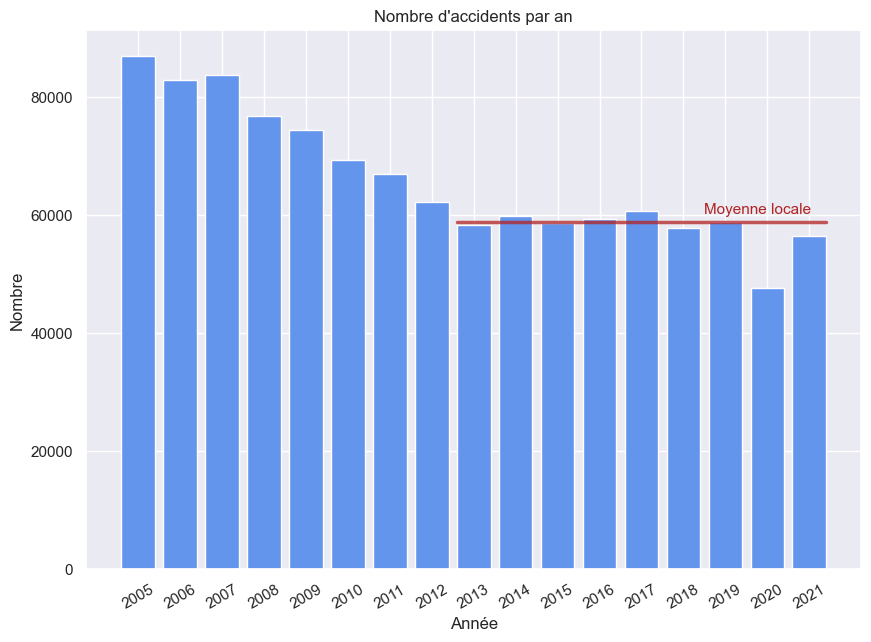

In [9]:
plt.figure(figsize=(10,7))
plt.plot((2012.6, 2021.4), (moy, moy), lw=2.5, alpha=0.75, color='firebrick')
plt.bar(range(2005, 2022), Y, color='cornflowerblue', width=0.8)
plt.title("Nombre d'accidents par an")
plt.xlabel("Année")
plt.ylabel("Nombre")
plt.xticks(range(2005, 2022), rotation='30')
plt.text(2018.5, moy*1.025, "Moyenne locale", color='firebrick', fontsize=11);

In [10]:
M=[]
for y in range(2005, 2022):
        M.append(caract[y].sort_values(by=["mois"]).value_counts(subset=["mois"], sort=False))
M = sum(M)
M #nombre total d'accidents par mois sur la période 2005-2021

mois
1        86332
2        76058
3        86313
4        87040
5        95761
6       105582
7       101169
8        84833
9       104248
10      106702
11       95399
12       92134
dtype: int64

In [11]:
moy = sum(M)/12
moy #moyenne du nombre d'accidents mensuel

93464.25

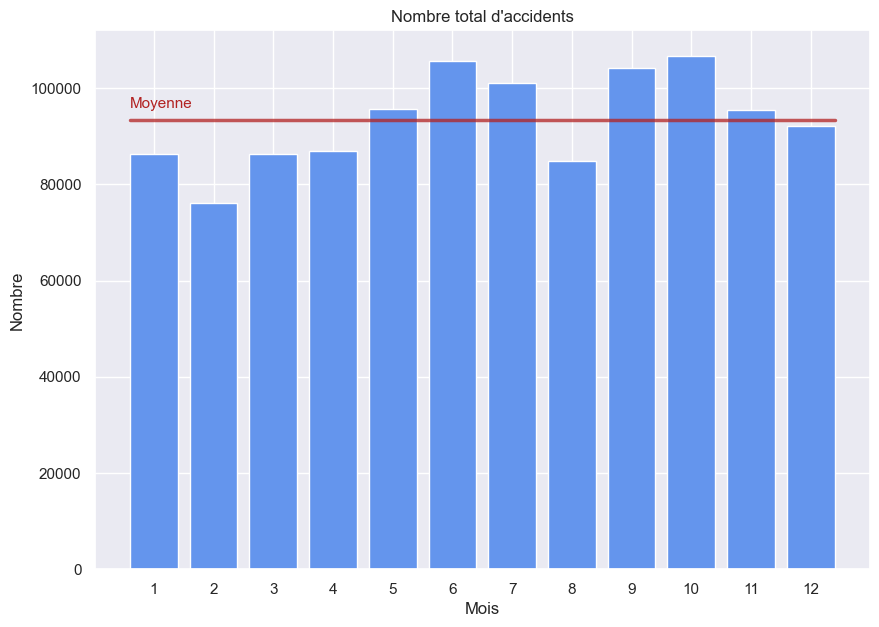

In [12]:
plt.figure(figsize=(10,7))
plt.plot((0.6, 12.4), (moy, moy), lw=2.5, alpha=0.75, color='firebrick')
plt.bar(range(1, 13), M, color='cornflowerblue', width=0.8)
plt.title("Nombre total d'accidents")
plt.xlabel("Mois")
plt.ylabel("Nombre")
plt.xticks(range(1, 13))
plt.text(0.6, moy*1.025 , "Moyenne", color='firebrick', fontsize=11);

In [13]:
M_moy = M
M_moy[1] /= 31
M_moy[2] /= 28
M_moy[3] /= 31
M_moy[4] /= 30
M_moy[5] /= 31
M_moy[6] /= 30
M_moy[7] /= 31
M_moy[8] /= 31
M_moy[9] /= 30
M_moy[10] /= 31
M_moy[11] /= 30
M_moy[12] /= 31
M_moy

mois
1       2784.903226
2       2716.357143
3       2784.290323
4       2901.333333
5       3089.064516
6       3519.400000
7       3263.516129
8       2736.548387
9       3474.933333
10      3442.000000
11      3179.966667
12      2972.064516
dtype: float64

In [14]:
moy = sum(M_moy)/12
moy

3072.031464413722

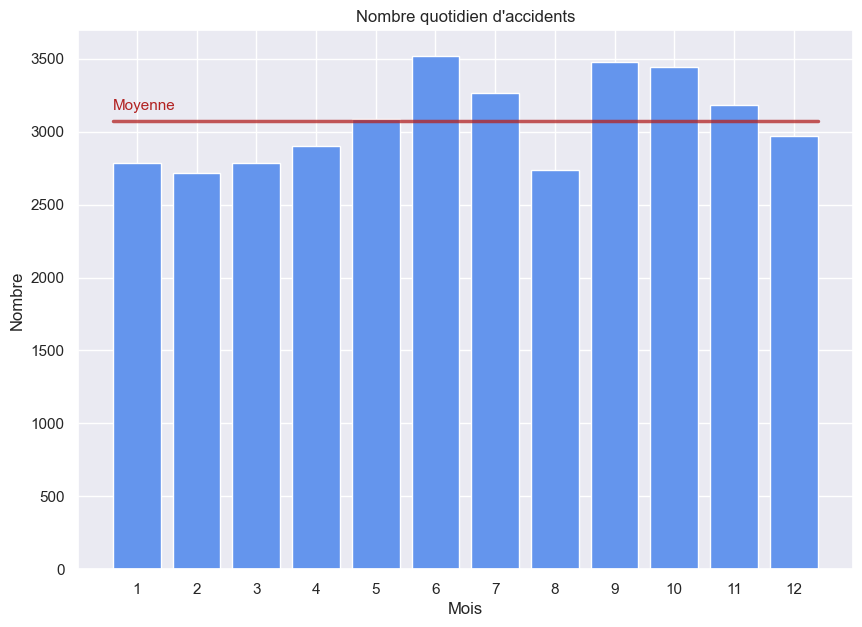

In [15]:
plt.figure(figsize=(10,7))
plt.plot((0.6, 12.4), (moy, moy), lw=2.5, alpha=0.75, color='firebrick')
plt.bar(range(1, 13), M_moy, color='cornflowerblue', width=0.8)
plt.title("Nombre quotidien d'accidents")
plt.xlabel("Mois")
plt.ylabel("Nombre")
plt.xticks(range(1, 13))
plt.text(0.6, moy*1.025 , "Moyenne", color='firebrick', fontsize=11);

In [16]:
M_2=[]
for y in range(2005, 2022):
        M_2.append(caract[y].sort_values(by=["mois"]).value_counts(subset=["mois"], sort=False))
M_2[0]

mois
1       7125
2       5568
3       6569
4       6618
5       7832
6       8469
7       7658
8       6479
9       7917
10      8057
11      7645
12      7089
dtype: int64

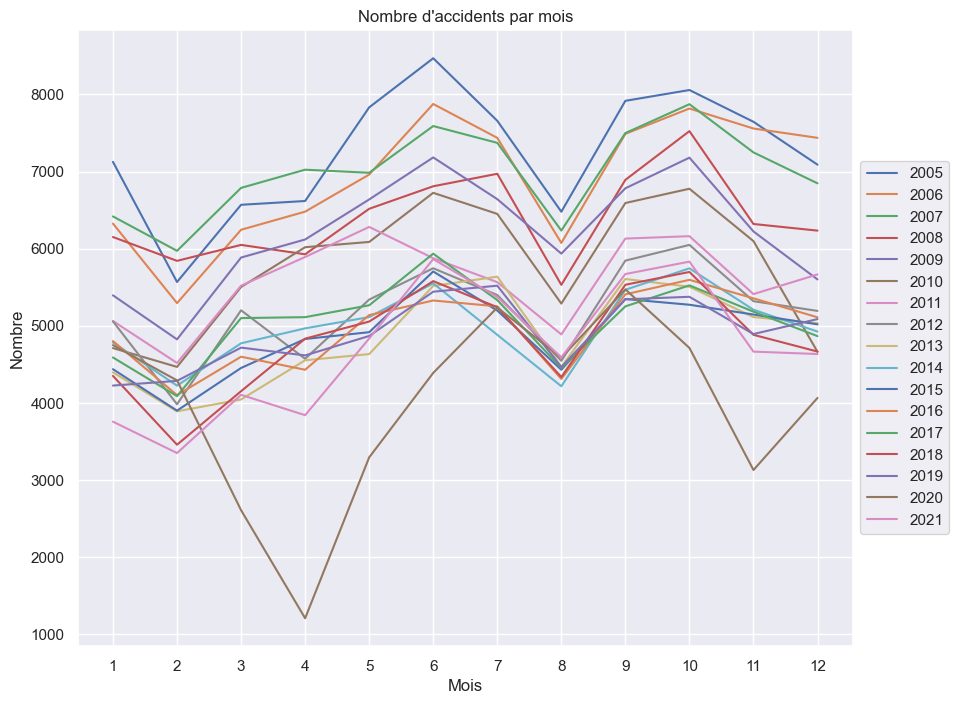

In [17]:
plt.figure(figsize=(10,8))
for i in range(17):
    plt.plot(range(1,13), M_2[i], label = i+2005)
plt.xticks(range(1, 13))
plt.title("Nombre d'accidents par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre")
plt.legend(bbox_to_anchor=(1,0.8));

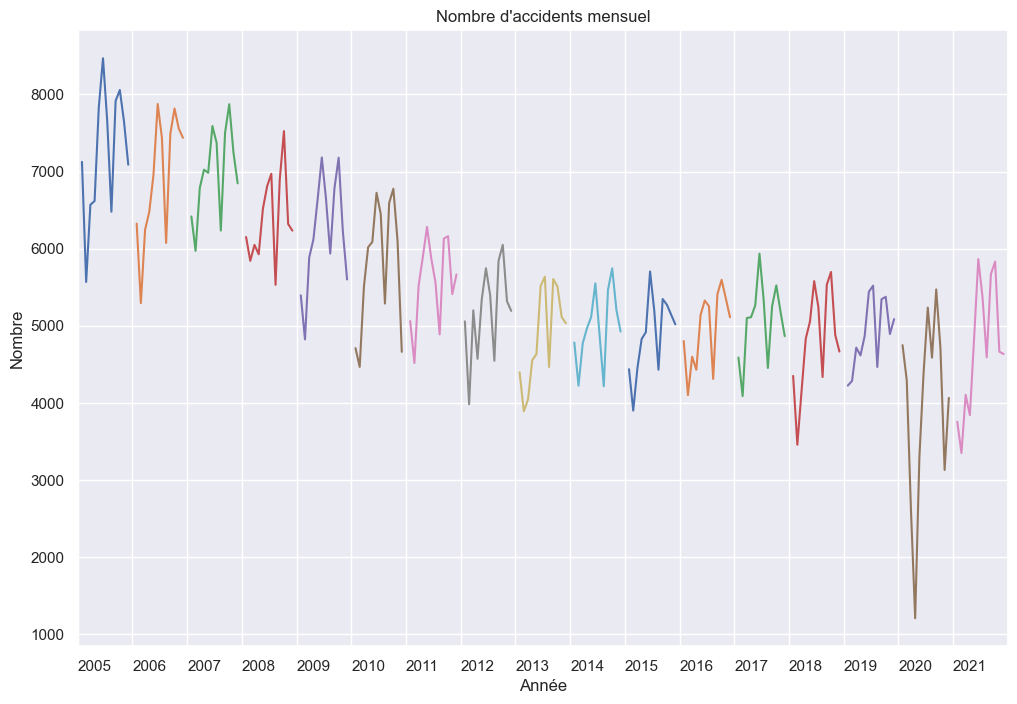

In [18]:
plt.figure(figsize=(12,8))
for i in range(17):
    plt.plot(range(1+13*i,13+13*i), M_2[i])
plt.xlim(0, 221)
plt.xticks([0, 13, 26, 39, 52, 65, 78, 91, 104, 117, 130, 143, 156, 169, 182, 195, 208],
          [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
          ha = 'left')
plt.title("Nombre d'accidents mensuel")
plt.xlabel("Année")
plt.ylabel("Nombre");